In [3]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [7]:
# constants
logsRootPath = '../out/build/x64-Release/output/'
logs1NamePrefix = 'ratioTrackRelativeL2Luminance_Adam_0.010000_'
logs2NamePrefix = 'unbiasedRelativeL2Luminance_Adam_0.010000_'
logs3NamePrefix = 'bbiasedRelativeL2Luminance_Adam_0.010000_'
logs4NamePrefix = 'lRelativeL2Luminance_Adam_0.010000_0.990000_0_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32'
featureList = ["frame", "MSE", "rBias", "rVar", "StdDev", "Loss", "Time"]
maxFrameCount = 200

In [8]:
def ParseData(logsNamePrefix: str) -> pd.DataFrame:
    df = pd.DataFrame(0, index=np.arange(maxFrameCount), columns=featureList) 
    suitableLogCounter = 0
    
    logsDirs = os.listdir(logsRootPath)
    
    # average collected data between different runs
    for dir in logsDirs:
        if logsNamePrefix in dir:
            #print('Found suitable log folder {}'.format(dir))
            tempDf = pd.read_csv('{}{}/logNrc.txt'.format(logsRootPath, dir), sep=" ", header=None)
            tempDf.columns = featureList
            tempDf = tempDf[:maxFrameCount]
            df = df.add(tempDf, fill_value=0)
            suitableLogCounter += 1
    
    print('[{}] suitable log count found: {}'.format(logsNamePrefix, suitableLogCounter))
    
    if suitableLogCounter > 0:
        df = df.div(suitableLogCounter)

    return df

In [9]:
df1 = ParseData(logs1NamePrefix)
df2 = ParseData(logs2NamePrefix)
df3 = ParseData(logs3NamePrefix)

[ratioTrackRelativeL2Luminance_Adam_0.010000_] suitable log count found: 10
[unbiasedRelativeL2Luminance_Adam_0.010000_] suitable log count found: 10
[bbiasedRelativeL2Luminance_Adam_0.010000_] suitable log count found: 10


In [54]:
totalMSE1 = 0
totalMSE2 = 0
totalMSE3 = 0

totalRBias1 = 0
totalRBias2 = 0
totalRBias3 = 0

totalRVar1 = 0
totalRVar2 = 0
totalRVar3 = 0

totalTime1 = 0
totalTime2 = 0
totalTime3 = 0

count = 100

for i in range(count):
    totalMSE1 += df1["MSE"][-i-2:-i-1].item()
    totalMSE2 += df2["MSE"][-i-2:-i-1].item()
    totalMSE3 += df3["MSE"][-i-2:-i-1].item()

    totalTime1 += df1["Time"][-i-2:-i-1].item()
    totalTime2 += df2["Time"][-i-2:-i-1].item()
    totalTime3 += df3["Time"][-i-2:-i-1].item()

    totalRBias1 += df1["rBias"][-i-2:-i-1].item()
    totalRBias2 += df2["rBias"][-i-2:-i-1].item()
    totalRBias3 += df3["rBias"][-i-2:-i-1].item()

    totalRVar1 += df1["rVar"][-i-2:-i-1].item()
    totalRVar2 += df2["rVar"][-i-2:-i-1].item()
    totalRVar3 += df3["rVar"][-i-2:-i-1].item()


totalMSE1 /= count
totalMSE2 /= count
totalMSE3 /= count

totalTime1 /= count
totalTime2 /= count
totalTime3 /= count

totalRBias1 /= count
totalRBias2 /= count
totalRBias3 /= count

totalRVar1 /= count
totalRVar2 /= count
totalRVar3 /= count

print("MSE RatioTrack:", totalMSE1)
print("MSE Unbiased:  ", totalMSE2)
print("MSE Biased:    ", totalMSE3)

print("rBias RatioTrack:", totalRBias1)
print("rBias Unbiased:  ", totalRBias2)
print("rBias Biased:    ", totalRBias3)

print("rVar RatioTrack:", totalRVar1)
print("rVar Unbiased:  ", totalRVar2)
print("rVar Biased:    ", totalRVar3)

print("Time RatioTrack:", totalTime1)
print("Time Unbiased:  ", totalTime2)
print("Time Biased:    ", totalTime3)


MSE RatioTrack: 0.37336173
MSE Unbiased:   0.31981081999999994
MSE Biased:     0.2846665500000001
rBias RatioTrack: -0.3614916900000002
rBias Unbiased:   -0.36667212
rBias Biased:     -0.38315041
rVar RatioTrack: 1.48819738
rVar Unbiased:   1.22680595
rVar Biased:     1.1106573
Time RatioTrack: 3.887080319999999
Time Unbiased:   3.724223040000001
Time Biased:     4.480273919999998


In [9]:
def ComparePlotDataframes(df1: pd.DataFrame, df2: pd.DataFrame, legendLabels: list, saveFileName: str):
    # ax = df1.plot.line(x='frame', y='Loss')
    # df2.plot.line(ax=ax, x='frame', y='Loss')
    # ax.legend(legendLabels)
    
    # ax = df1[:100].plot.line(x='frame', y='Loss')
    # df2[:100].plot.line(ax=ax, x='frame', y='Loss')
    # ax.legend(legendLabels)
    
    ax = df1.plot.line(x='frame', y='Loss')
    df2.plot.line(ax=ax, x='frame', y='Loss', logy='sym')
    ax.legend(legendLabels)
    plt.xlabel('Frame number')
    plt.ylabel('Loss')

    plt.savefig(saveFileName)
    plt.show()
    

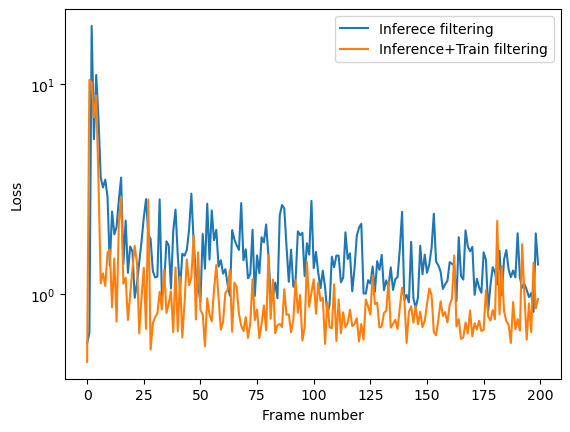

In [10]:
ComparePlotDataframes(df1, df2, ['Inferece filtering', 'Inference+Train filtering'], 'OriginalVsTrainFilteringLoss.png')

In [10]:
def ComparePlotDataframes(df1: pd.DataFrame, df2: pd.DataFrame, df3: pd.DataFrame, legendLabels: list, saveFileName: str):
    # ax = df1.plot.line(x='frame', y='Loss')
    # df2.plot.line(ax=ax, x='frame', y='Loss')
    # ax.legend(legendLabels)
    
    # ax = df1[:100].plot.line(x='frame', y='Loss')
    # df2[:100].plot.line(ax=ax, x='frame', y='Loss')
    # ax.legend(legendLabels)
    
    ax = df1.plot.line(x='frame', y='Loss')
    df2.plot.line(ax=ax, x='frame', y='Loss', logy='sym')
    df3.plot.line(ax=ax, x='frame', y='Loss', logy='sym')
    ax.legend(legendLabels)
    plt.xlabel('Frame number')
    plt.ylabel('Loss')

    plt.savefig(saveFileName)
    plt.show()
    

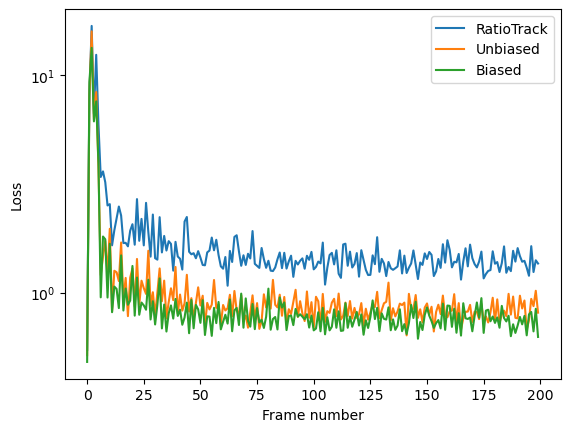

In [12]:
ComparePlotDataframes(df1, df2, df3, ['RatioTrack', 'Unbiased', 'Biased'], 'RatioTrackVsUnbiasedVsBiasedLoss.png')